<a href="https://colab.research.google.com/github/TiagoHarari/AR_Exchange_Rate_Analysis/blob/main/AR_Exchange_Rate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Series de Tiempo. Tipo De Cambio

En este proyecto se analizará la evolución del tipo de de cambio en Argentina durante los últimos tres gobiernos.
Mauricio Macri 10 Diciembre 2015 - 10 Diciembre 2019
Alberto Fernandez 10 Diciembre 2019 - 10 Diciembre 2023
Javier Milei 10 Diciembre 2023 - Actualidad

**Fuente**: https://datos.gob.ar/bg/dataset



---

*Se hara un analisis de datos de la fuente, usando Python. Se utilizaran las librerias Pandas, Matplotlib, Numpy y Seaborn.*

*El objetivo es comprender la evolucion del tipo de cambio en Argentina, el cual tiene una gran incidencia en la coyuntura economica de Argentina*

In [27]:
import pandas as pd
import requests
from io import StringIO
import seaborn as sns
from ipywidgets import interact, widgets
import matplotlib.dates as mdates
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets



## Leer Datos

In [13]:
# URL del archivo CSV
url = "https://apis.datos.gob.ar/series/api/series/?ids=168.1_T_CAMBIOR_D_0_0_26&limit=5000&format=csv"

# Realizar la solicitud GET con un encabezado User-Agent
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=headers)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    data = StringIO(response.text)
    data = pd.read_csv(data)

In [14]:
print(data.head())
print(f'Shape: {data.shape}')

  indice_tiempo  tipo_cambio_bna_vendedor
0    2014-11-03                      8.49
1    2014-11-04                      8.51
2    2014-11-05                      8.51
3    2014-11-06                      8.51
4    2014-11-07                      8.51
Shape: (3455, 2)


## Limpiar Datos

In [15]:
tc = data.rename(columns={"indice_tiempo": "dia",
                          "tipo_cambio_bna_vendedor": "tc_bn"})
tc.columns

Index(['dia', 'tc_bn'], dtype='object')

In [16]:
tc["dia"] = pd.to_datetime(tc['dia'])
print(tc["dia"].info())

<class 'pandas.core.series.Series'>
RangeIndex: 3455 entries, 0 to 3454
Series name: dia
Non-Null Count  Dtype         
--------------  -----         
3455 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 27.1 KB
None


In [17]:
print(f'Missing Values: {tc.isnull().values.any()}')

Missing Values: False


In [18]:
# Agregar info sobre gobiernos
tc['gobierno'] = ""

tc.loc[tc['dia'] >= "2015-12-10", 'gobierno'] = "Macri"
tc.loc[tc['dia'] >= "2019-12-10", 'gobierno'] = "AF"
tc.loc[tc['dia'] >= "2023-12-10", 'gobierno'] = "Milei"

# Droppear otros gobiernos
tc = tc.loc[tc['gobierno'] != ""]

In [19]:
tc.head()

,dia,tc_bn,gobierno
402,2015-12-10,9.755,Macri
403,2015-12-11,9.790,Macri
404,2015-12-12,9.790,Macri
405,2015-12-13,9.790,Macri
406,2015-12-14,9.800,Macri


## Graficar TC

In [29]:
# Asegúrate de tener esta línea al inicio de tu notebook
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

# Asegúrate de que tus datos estén cargados correctamente
# Ejemplo:
# tc = pd.read_csv('your_data.csv')

def plot_exchange_rate(gobierno):
    plt.figure(figsize=(14, 7))

    if gobierno == 'Todos':
        # Graficar cada gobierno por separado
        for gov in tc['gobierno'].unique():
            subset = tc[tc['gobierno'] == gov]
            plt.plot(subset['dias_de_gobierno'], subset['tc_normalizado'], label=gov)
    else:
        subset = tc[tc['gobierno'] == gobierno]
        plt.plot(subset['dias_de_gobierno'], subset['tc_normalizado'], label=gobierno)

    plt.xlabel('Días de Gobierno')
    plt.ylabel('Tipo de Cambio Normalizado')
    plt.title('Tipo de Cambio Normalizado por Gobierno')
    plt.legend()
    plt.grid(True)
    plt.show()

# Crear el widget del menú desplegable
gobierno_dropdown = widgets.Dropdown(
    options=['Todos'] + list(tc['gobierno'].unique()),
    value='Todos',
    description='Gobierno:',
)

# Vincular la función de graficar con el widget
interact(plot_exchange_rate, gobierno=gobierno_dropdown)


interactive(children=(Dropdown(description='Gobierno:', options=('Todos', 'Macri', 'AF', 'Milei'), value='Todo…

<function __main__.plot_exchange_rate(gobierno)>

## Graficar TC Normalizado

In [21]:
# Crear una columna 'dias_de_gobierno'
tc['dias_de_gobierno'] = 0

# Calcular los días de gobierno para cada gobierno
for gobierno in tc['gobierno'].unique():
    subset = tc[tc['gobierno'] == gobierno].copy()
    first_day = subset['dia'].iloc[0]
    tc.loc[tc['gobierno'] == gobierno, 'dias_de_gobierno'] = (subset['dia'] - first_day).dt.days

# Crear una columna 'tc_normalizado'
tc['tc_normalizado'] = 0.0

# Calcular el tipo de cambio normalizado para cada gobierno
for gobierno in tc['gobierno'].unique():
    subset = tc[tc['gobierno'] == gobierno].copy()
    first_day_value = subset['tc_bn'].iloc[0]
    tc.loc[tc['gobierno'] == gobierno, 'tc_normalizado'] = (subset['tc_bn'] / first_day_value) * 100

In [22]:
tc.head()

,dia,tc_bn,gobierno,dias_de_gobierno,tc_normalizado
402,2015-12-10,9.755,Macri,0,100.000000
403,2015-12-11,9.790,Macri,1,100.358790
404,2015-12-12,9.790,Macri,2,100.358790
405,2015-12-13,9.790,Macri,3,100.358790
406,2015-12-14,9.800,Macri,4,100.461302


In [23]:
def plot_exchange_rate(gobierno):
    plt.figure(figsize=(14, 7))

    if gobierno == 'Todos':
        # Graficar cada gobierno por separado
        for gov in tc['gobierno'].unique():
            subset = tc[tc['gobierno'] == gov]
            plt.plot(subset['dias_de_gobierno'], subset['tc_normalizado'], label=gov)
    else:
        subset = tc[tc['gobierno'] == gobierno]
        plt.plot(subset['dias_de_gobierno'], subset['tc_normalizado'], label=gobierno)

    plt.xlabel('Días de Gobierno')
    plt.ylabel('Tipo de Cambio Normalizado')
    plt.title('Tipo de Cambio Normalizado por Gobierno')
    plt.legend()
    plt.grid(True)
    plt.show()

# Crear el widget del menú desplegable
gobierno_dropdown = widgets.Dropdown(
    options=['Todos'] + list(tc['gobierno'].unique()),
    value='Todos',
    description='Gobierno:',
)

# Vincular la función de graficar con el widget
interact(plot_exchange_rate, gobierno=gobierno_dropdown)

interactive(children=(Dropdown(description='Gobierno:', options=('Todos', 'Macri', 'AF', 'Milei'), value='Todo…

<function __main__.plot_exchange_rate(gobierno)>

## Tabla Comparativa

In [24]:
# Crear listas para almacenar los resultados
gobiernos = []
tc_iniciales = []
tc_finales = []
variaciones_absolutas = []
variaciones_porcentuales = []

# Calcular los datos para cada gobierno
for gobierno in tc['gobierno'].unique():
    subset = tc[tc['gobierno'] == gobierno].copy()
    tc_inicial = round(subset['tc_bn'].iloc[0], 2)
    tc_final = round(subset['tc_bn'].iloc[-1], 2)
    variacion_absoluta = round(tc_final - tc_inicial, 2)
    variacion_porcentual = round((variacion_absoluta / tc_inicial) * 100, 2)

    gobiernos.append(gobierno)
    tc_iniciales.append(tc_inicial)
    tc_finales.append(tc_final)
    variaciones_absolutas.append(variacion_absoluta)
    variaciones_porcentuales.append(variacion_porcentual)

# Crear un DataFrame con los resultados
tabla_resultados = pd.DataFrame({
    'Gobierno': gobiernos,
    'TC Inicial': tc_iniciales,
    'TC Final': tc_finales,
    'Variación Absoluta': variaciones_absolutas,
    'Variación Porcentual': variaciones_porcentuales
})

tabla_resultados

,Gobierno,TC Inicial,TC Final,Variación Absoluta,Variación Porcentual
0,Macri,9.76,62.5,52.74,540.37
1,AF,62.75,400.5,337.75,538.25
2,Milei,400.50,888.5,488.00,121.85


## Devaluaciones por Mes

In [25]:
# Calculat TC Mensual
tc_mes = tc.groupby(tc['dia'].dt.to_period('M')).agg({
    'tc_bn': 'mean'
}).reset_index()

# Calcular las variaciones intermensuales
tc_mes['variacion'] = tc_mes['tc_bn'].pct_change() * 100

# Crear una columna 'mes' para el nombre del mes
tc_mes['mes'] = tc_mes['dia'].dt.month

tc_mes

,dia,tc_bn,variacion,mes
0,2015-12,12.289773,NaN,12
1,2016-01,13.770968,12.052257,1
2,2016-02,14.927586,8.398963,2
3,2016-03,15.117742,1.273854,3
4,2016-04,14.623333,-3.270387,4
...,...,...,...,...
96,2023-12,655.778126,77.741734,12
97,2024-01,837.403326,27.696136,1
98,2024-02,853.017341,1.864575,2
99,2024-03,869.500100,1.932289,3


Boxplot para ver las distribuciones de las devaluaciones para cada mes calendario:

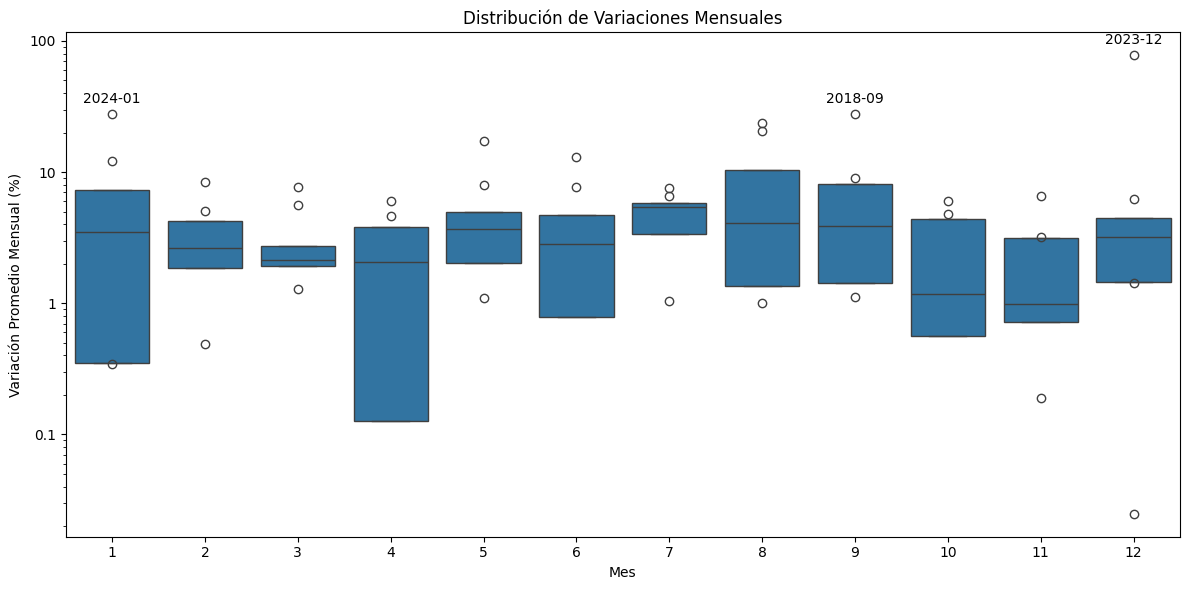

In [26]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

sns.boxplot(x='mes', y='variacion', data=tc_mes, whis=0)
plt.yscale('log')  # Configurar escala logarítmica en el eje y

# Etiquetar algunos outliers (devs > 25%)
def label_outliers(row):
    if row['variacion'] > 25:
        plt.text(row.mes-1, row['variacion']*1.15, row['dia'],
                 horizontalalignment='center', verticalalignment='bottom',
                 fontsize=10, color='black')

tc_mes.apply(label_outliers, axis=1)

# Añadir etiquetas y título
plt.yscale('log')
yticks = [0.1, 1, 10, 100]  # Definir los valores deseados en la escala logarítmica
yticklabels = ['0.1', '1', '10', '100']  # Definir las etiquetas correspondientes
plt.yticks(yticks, yticklabels)

# Añadir etiquetas y título
plt.xlabel('Mes')
plt.ylabel('Variación Promedio Mensual (%)')
plt.title('Distribución de Variaciones Mensuales')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


**Fin**
---

